In [5]:
options(warn=-1)

#home 
setwd("C://Users//Cherch//DataScience//project")

#work 
#setwd("C://bb//DataScience//project")


require("caret")
require("openxlsx")
require("tidyverse")
require(devtools)
library(dplyr)
library(car)
library(stringr)
if(!require("gridExtra")) install.packages("gridExtra")
library(naniar)
require(MissMech)



#protocol<-read.xlsx("../project/BoxOffice - Data Retrieval Protocol.xlsx", sheet = "protocol")
protocol<-read.xlsx("../project/BoxOffice - Data Retrieval Protocol WIth Outliers.xlsx", sheet = "protocol")

rownames(protocol) <- str_trim(protocol$Feature.name)

load("../data/BoxOffice_ff.RData")

Loading required package: MissMech



# 2.3 Correlation Graph

corrplot 0.84 loaded



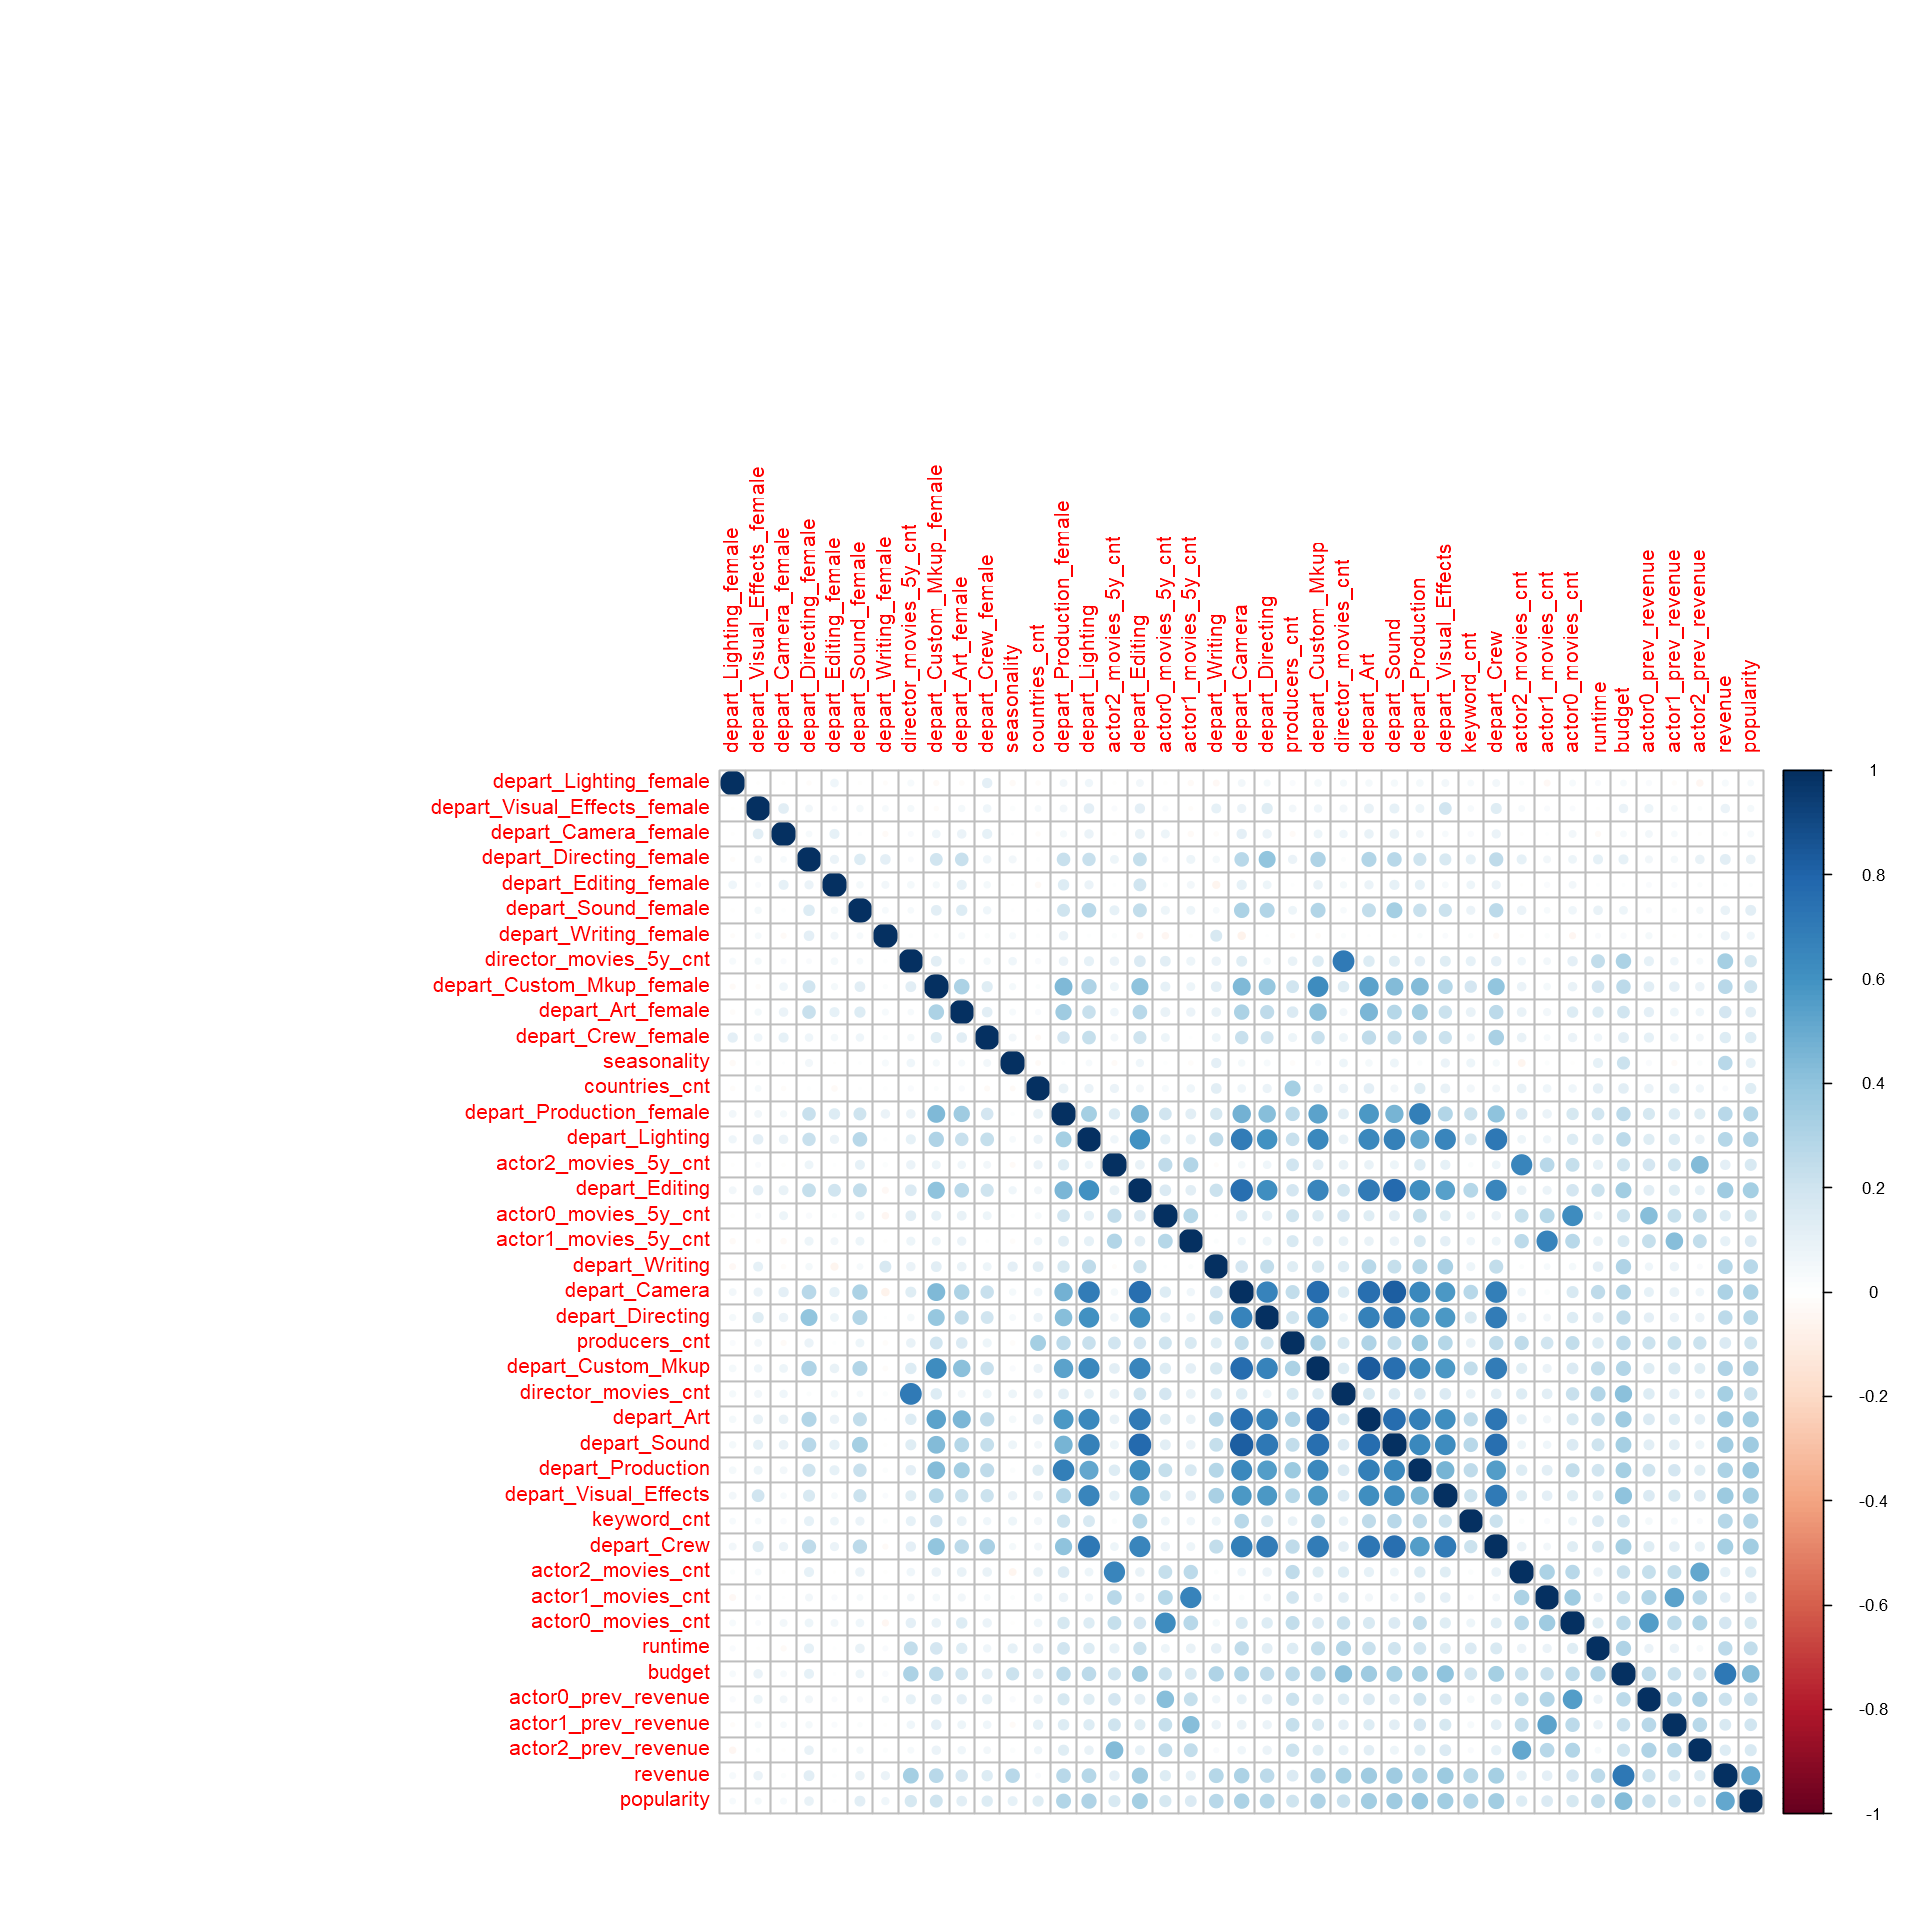

In [2]:
# list all the numeric variables
numerics<-str_trim(protocol$Feature.name[protocol$Value.type == "Numeric"])

#install.packages("corrplot")
library(corrplot)

corr<-cor(movies[numerics], method = "spearman", use = "complete.obs")

options(repr.plot.width = 16, repr.plot.height = 16)
corrplot(corr, method="circle")


In [ ]:
# 2.4 Revenue distribution is described in the 'mechkar' report (attached)

In [ ]:
# 2.5 outalyers graphs are presented in the Outliers.ipynb file

In [ ]:
# 2.6 Missing variables

In [3]:
getMissingness <- function (data, getRows = FALSE, print_rows = 10) {
  require(dplyr)
  l <- nrow(data)
  vn <- names(data)
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x)))
  for (n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
    cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
  }
  names(cnt) <- c("var", "na.count")
  cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
  nadf$na.cnt <- 0
  nadf$na.cnt <- rowSums(nadf)
  cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count >
                                                                    0)
  totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss),
                " (", as.character(round(totmiss/nrow(data) * 100, 1)),
                "%)", " complete rows. Original data has ", nrow(data),
                " rows.", sep = ""))
  if (getRows == TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
  }
  print(list(head(cnt, n = print_rows), msg))
  return(list(missingness = cnt, message = msg, rows = idx$rn))
}

getMissingness(movies, 85)


[[1]]
                   var na.count rate
1              revenue     4382 59.4
2  actor2_prev_revenue     3423 46.4
3  actor1_prev_revenue     3201 43.4
4  actor0_prev_revenue     2752 37.3
5     sw_female_actor0      934 12.7
6       sw_male_actor0      934 12.7
7     sw_female_actor2      788 10.7
8       sw_male_actor2      788 10.7
9     sw_female_actor1      782 10.6
10      sw_male_actor1      782 10.6

[[2]]
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
revenue,4382,59.4
actor2_prev_revenue,3423,46.4
actor1_prev_revenue,3201,43.4
actor0_prev_revenue,2752,37.3
sw_female_actor0,934,12.7
sw_male_actor0,934,12.7
sw_female_actor2,788,10.7
sw_male_actor2,788,10.7
sw_female_actor1,782,10.6


# 2.7 Missingness Heatmap

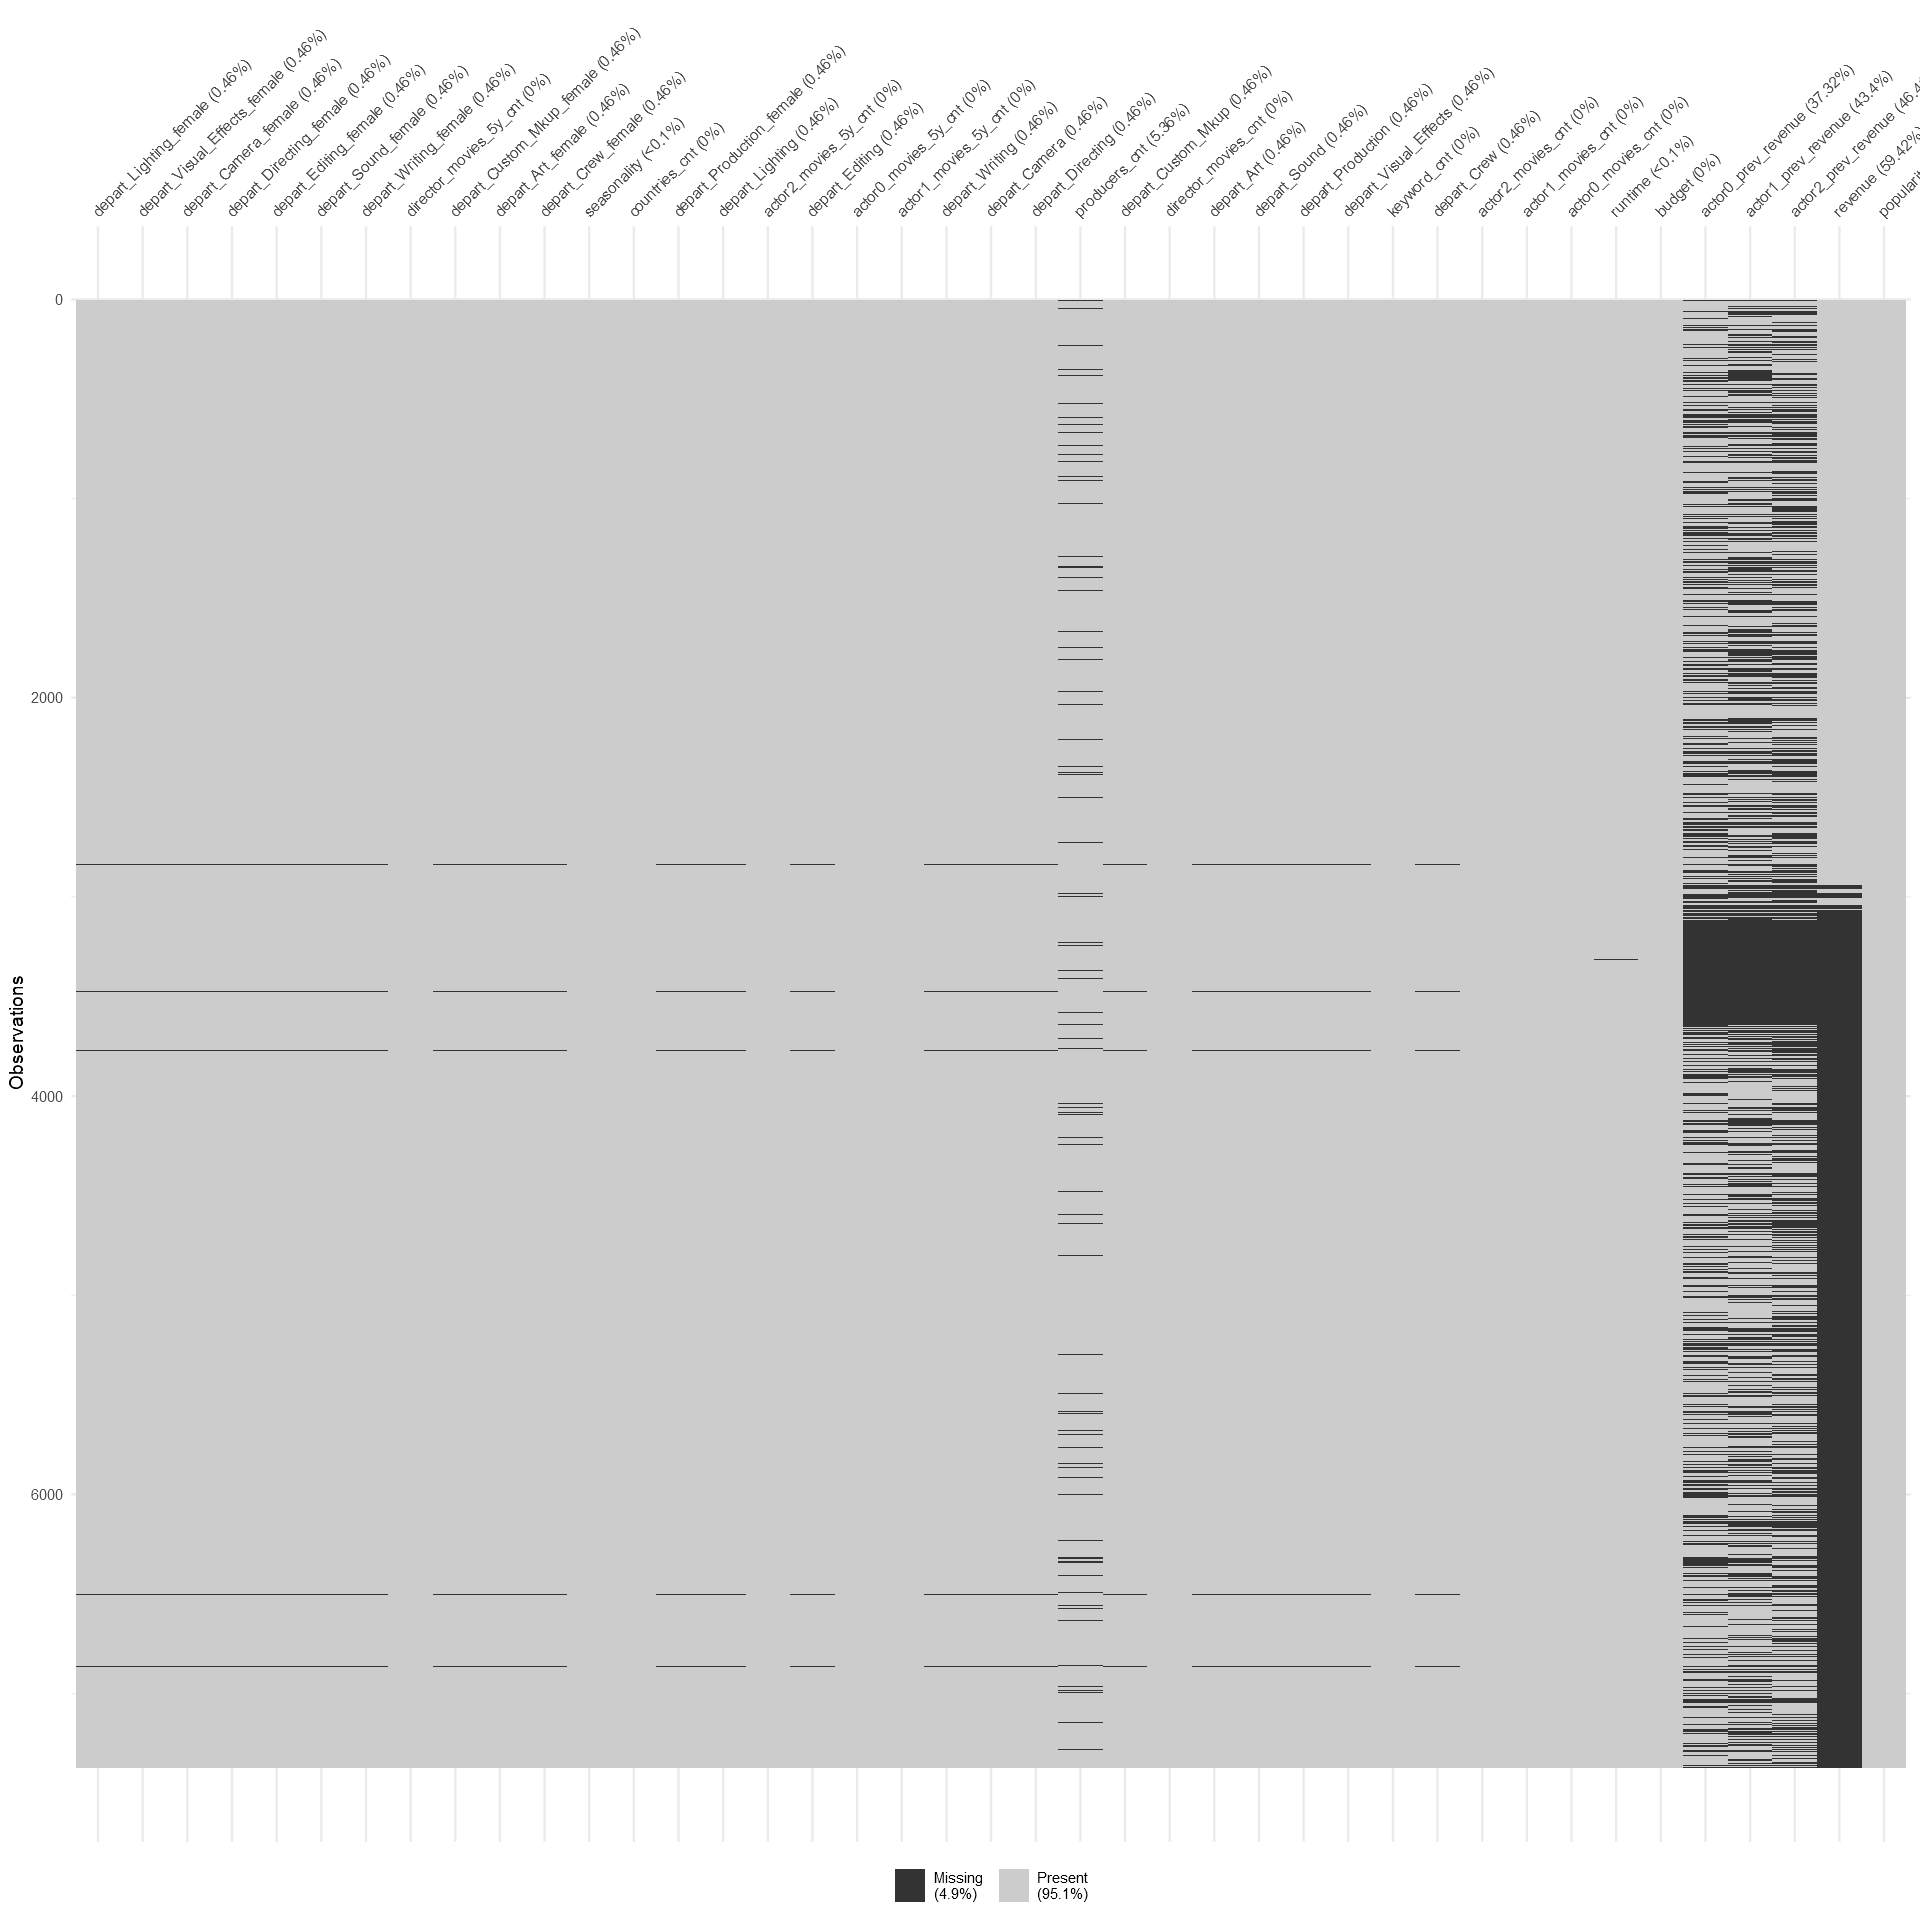

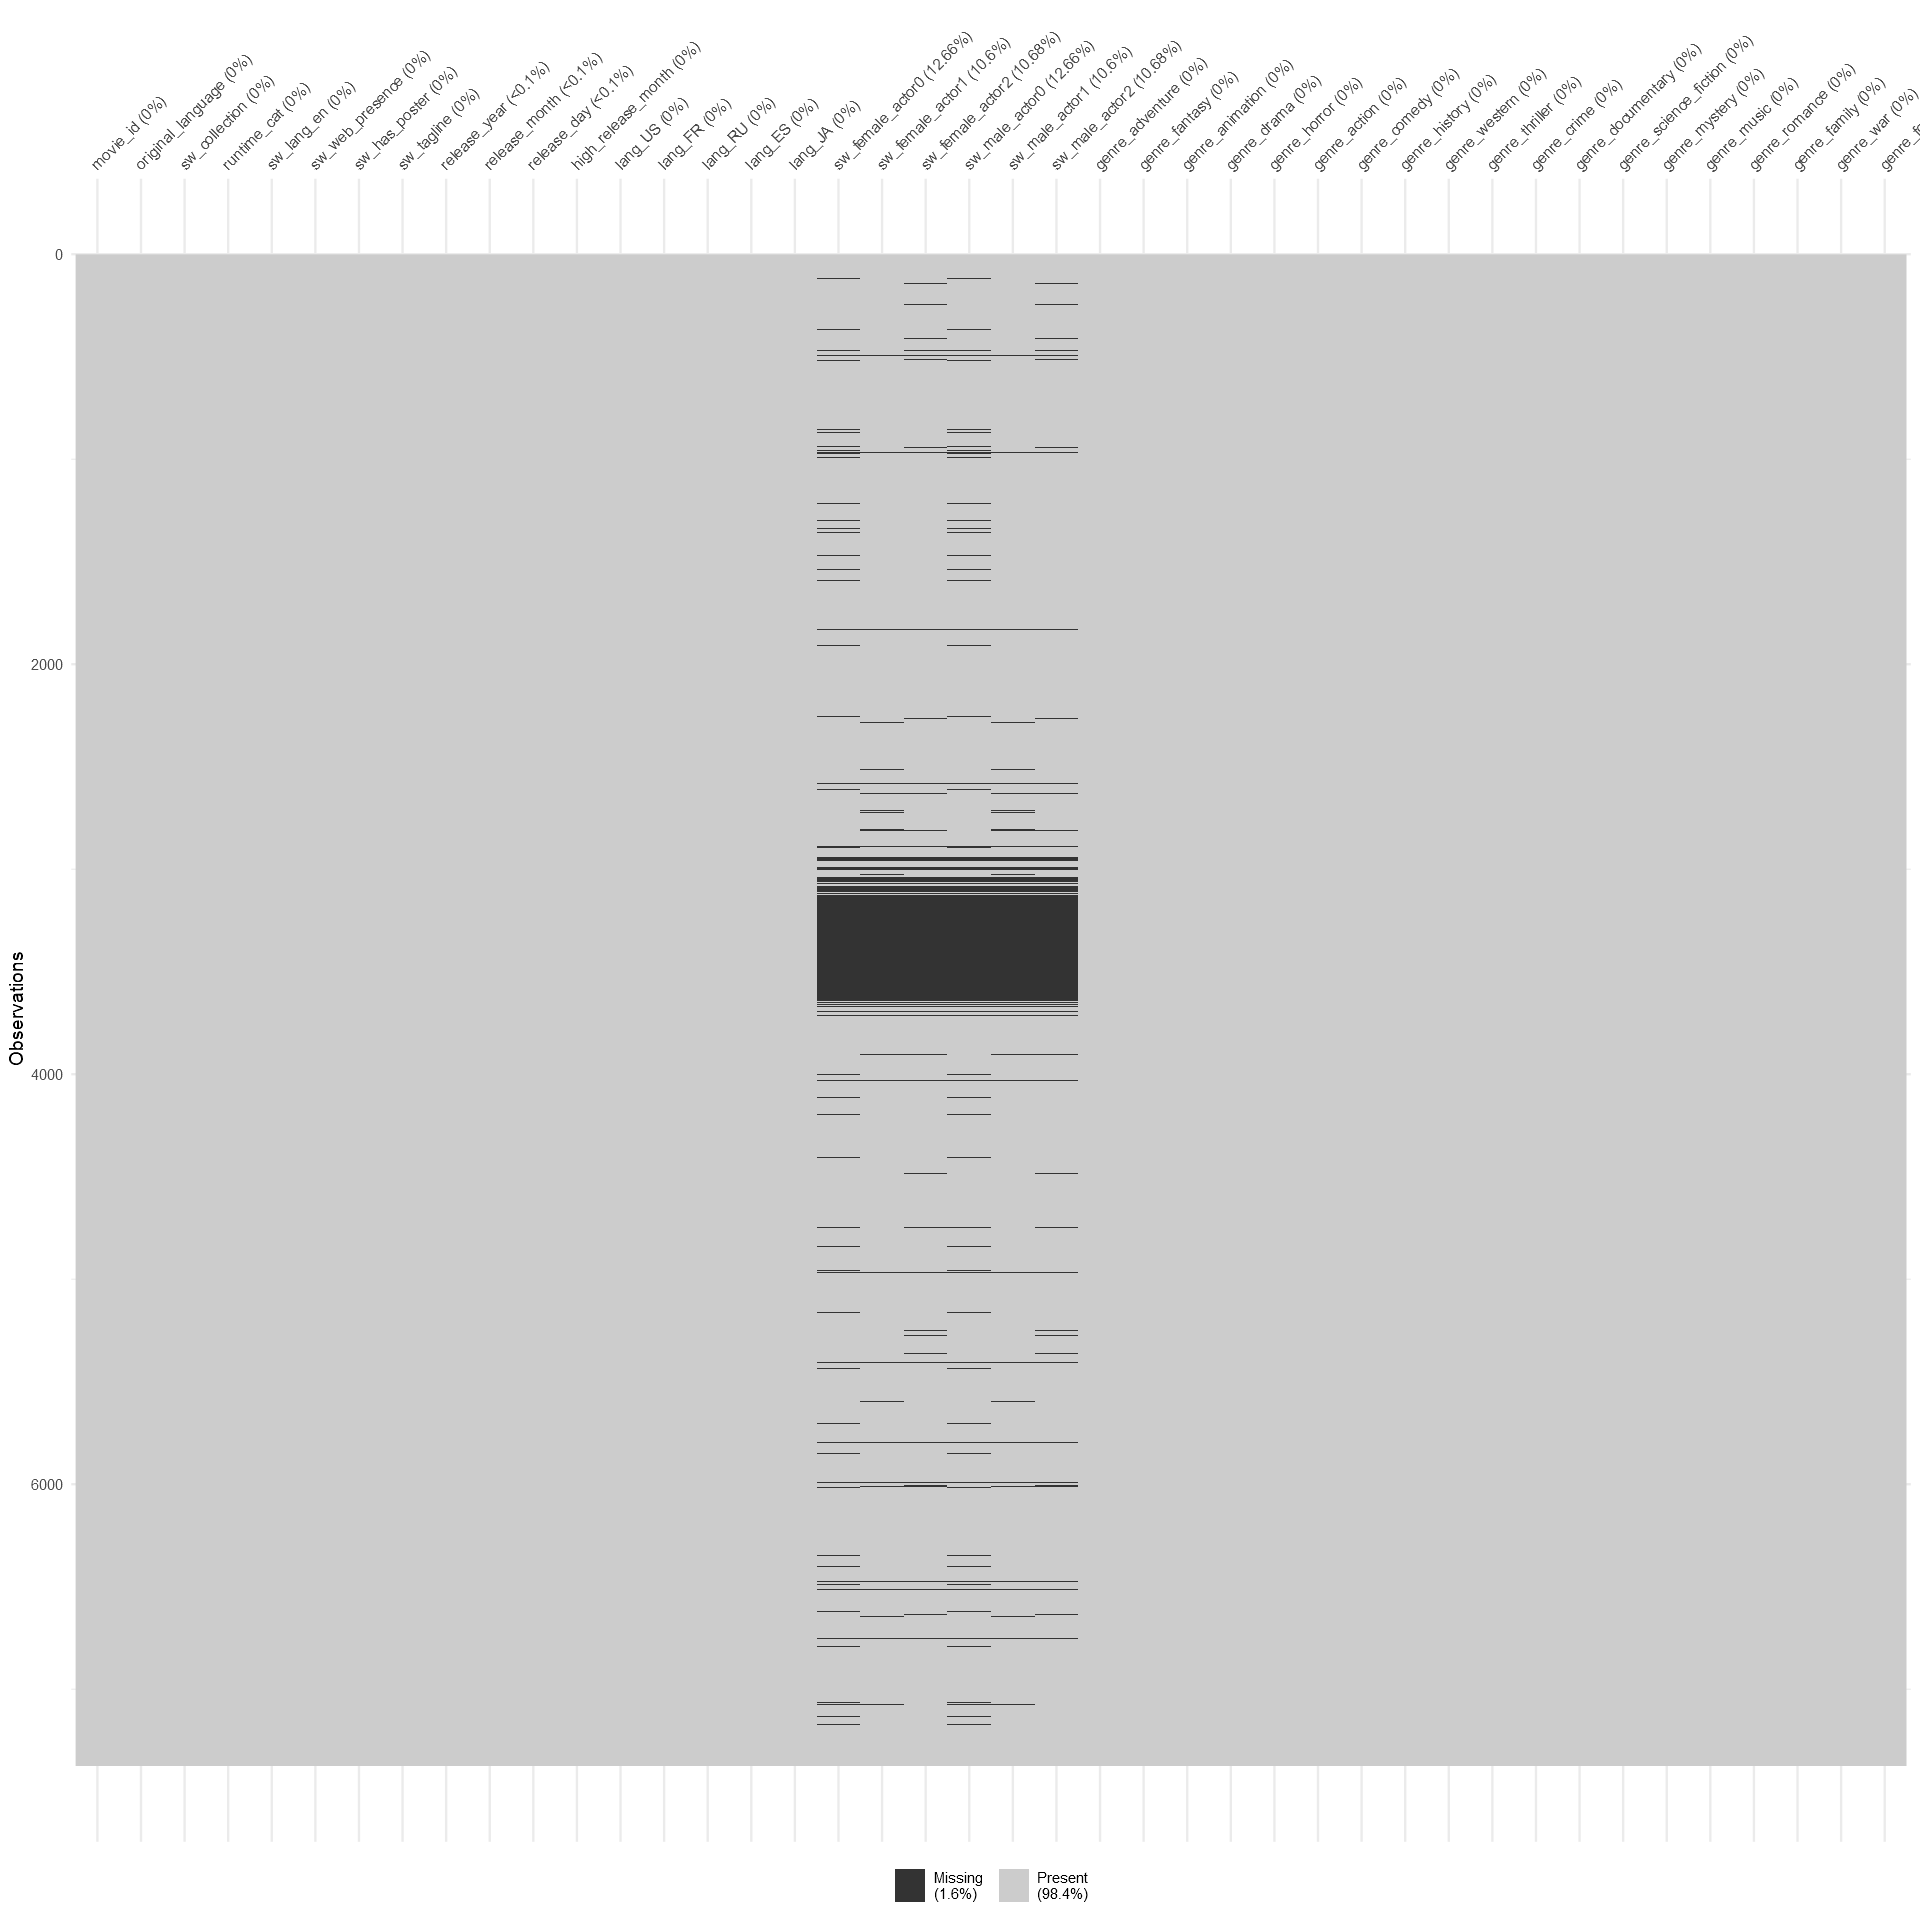

In [6]:
# list all the numeric variables
numerics<-str_trim(protocol$Feature.name[protocol$Value.type == "Numeric"])

# list all the numeric variables
categorics<-str_trim(protocol$Feature.name[protocol$Value.type == "Categorical"])


options(repr.plot.width = 16, repr.plot.height = 16)

vis_miss(movies[numerics])

vis_miss(movies[categorics])
